#[google colab連結](https://colab.research.google.com/drive/1v360tjnzKcTemAqyXqrK-U_UEKRoqOf4)


#腦中風人數

In [2]:
#採用政府公開資料-腦中風病人住院日起一百八十日內之平均住院日數(包含住院期間及急性後期照護)
import pandas as pd
brain_stroke = pd.read_excel("腦中風人數.xlsx")
brain_stroke.head()

,年度季別,醫事機構代碼,醫事機構名稱,特約類別,腦中風病人住院日起一百八十日內之案件件數,腦中風病人住院日起一百八十日內之手術件數,腦中風病人住院日起一百八十日內之平均住院日數,所屬分區業務組指標值,全國指標值,縣市別,行政區
0,105年第四季,1532040039,天成醫院,地區醫院,3,3.0,1.0000,0.8559,0.863,桃園市,楊梅區
1,105年第四季,117030010,衛生福利部臺中醫院,區域醫院,2,2.0,1.0000,0.8944,0.863,臺中市,西區
2,105年第四季,501110514,三軍總醫院附設民眾診療服務處,醫學中心,24,32.0,0.7500,0.8964,0.863,臺北市,內湖區
3,105年第四季,601160016,臺北榮民總醫院,醫學中心,47,52.0,0.9038,0.8964,0.863,臺北市,北投區
4,105年第四季,622020017,臺中榮民總醫院嘉義分院,區域醫院,1,2.0,0.5000,0.7216,0.863,嘉義市,西區


In [3]:
#更換欄名
col_names = ["year", "hosp_code", "hosp_name", "hosp_type", "case", "surgery", "be_in_hosp", "區域指標值", "全國指標值", "city", "village"]
brain_stroke.columns = col_names
brain_stroke.head()

,year,hosp_code,hosp_name,hosp_type,case,surgery,be_in_hosp,區域指標值,全國指標值,city,village
0,105年第四季,1532040039,天成醫院,地區醫院,3,3.0,1.0000,0.8559,0.863,桃園市,楊梅區
1,105年第四季,117030010,衛生福利部臺中醫院,區域醫院,2,2.0,1.0000,0.8944,0.863,臺中市,西區
2,105年第四季,501110514,三軍總醫院附設民眾診療服務處,醫學中心,24,32.0,0.7500,0.8964,0.863,臺北市,內湖區
3,105年第四季,601160016,臺北榮民總醫院,醫學中心,47,52.0,0.9038,0.8964,0.863,臺北市,北投區
4,105年第四季,622020017,臺中榮民總醫院嘉義分院,區域醫院,1,2.0,0.5000,0.7216,0.863,嘉義市,西區


In [4]:
brain_stroke.shape

(2566, 11)

In [5]:
#有多少時間點
brain_stroke["year"].unique()

array(['105年第四季', '102年第一季', '103年第二季', '101年第一季', '102年第三季', '105年第一季',
       '102年第二季', '104年第二季', '102年第四季', '101年第四季', '101年第二季', '104年第四季',
       '103年第一季', '103年第四季', '104年第一季', '103年第三季', '104年第三季', '101年第三季',
       '105年第三季', '105年第二季', '106年第三季', '107年第二季', '106年第四季', '106年第二季',
       '107年第一季'], dtype=object)

In [6]:
brain_stroke["city"].unique()

array(['桃園市', '臺中市', '臺北市', '嘉義市', '高雄市', '彰化縣', '基隆市', '新竹市', '南投縣',
       '嘉義縣', '屏東縣', '臺南市', '宜蘭縣', '新北市', '新竹縣', '雲林縣', '臺東縣', '苗栗縣',
       '花蓮縣', '澎湖縣'], dtype=object)

In [7]:
#取出台北市資料
is_taipei = brain_stroke["city"] == "臺北市"
is_center = brain_stroke["hosp_type"] == "醫學中心"
is_year = brain_stroke["year"] == "107年第一季"
taipei_per_season = brain_stroke[is_taipei]
taipei_per_season.tail()

,year,hosp_code,hosp_name,hosp_type,case,surgery,be_in_hosp,區域指標值,全國指標值,city,village
2512,107年第一季,1101160017,振興醫療財團法人振興醫院,區域醫院,39,42.0,0.9286,0.0,0.0,臺北市,北投區
2513,107年第一季,1101160026,醫療財團法人辜公亮基金會和信治癌中心醫院,區域醫院,1,1.0,1.0000,0.0,0.0,臺北市,北投區
2531,107年第一季,1301170017,臺北醫學大學附設醫院,區域醫院,19,23.0,0.8261,0.0,0.0,臺北市,信義區
2535,107年第一季,1501190031,西園醫院,地區醫院,4,4.0,1.0000,0.0,0.0,臺北市,萬華區
2555,107年第一季,1301200010,臺北市立萬芳醫院－委託財團法人臺北醫學大學辦理,醫學中心,46,48.0,0.9583,0.0,0.0,臺北市,文山區


In [8]:
grouped = taipei_per_season.groupby("year")
case_counts_ser = grouped["case"].sum().sort_values(ascending=False)
case_counts_ser.index

Index(['107年第二季', '105年第二季', '102年第四季', '106年第三季', '105年第三季', '104年第二季',
       '102年第三季', '106年第四季', '102年第二季', '106年第二季', '103年第四季', '103年第二季',
       '103年第三季', '101年第二季', '104年第三季', '104年第四季', '105年第四季', '103年第一季',
       '101年第四季', '101年第一季', '101年第三季', '102年第一季', '104年第一季', '107年第一季',
       '105年第一季'],
      dtype='object', name='year')

In [9]:
case_counts_ser.values

array([504, 480, 479, 452, 448, 444, 439, 438, 437, 433, 432, 432, 427,
       420, 416, 414, 411, 407, 402, 383, 380, 378, 371, 370, 359])

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


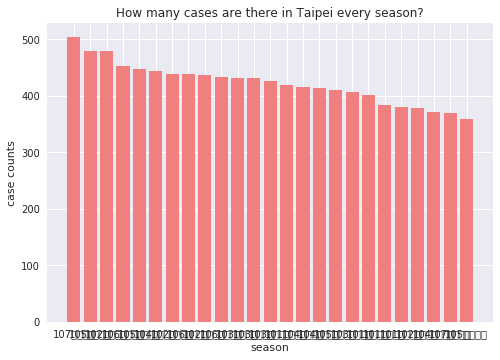

In [11]:
import matplotlib.pyplot as plt
continent_cnts = len(case_counts_ser.values)
plt.bar(range(continent_cnts), case_counts_ser.values, color="#f08080")
plt.xticks(range(continent_cnts), case_counts_ser.index)
plt.title("How many cases are there in Taipei every season?")
plt.xlabel("season")
plt.ylabel("case counts")
plt.rcParams['font.sans-serif']=['SimHei']
plt.show()
#matplotlib中文無法顯示

In [12]:
#取出107年第一季資料
year107_s1 = brain_stroke[is_year]
year107_s1.head()


,year,hosp_code,hosp_name,hosp_type,case,surgery,be_in_hosp,區域指標值,全國指標值,city,village
2457,107年第一季,101090517,臺北市立聯合醫院,區域醫院,43,44.0,0.9773,0.0,0.0,臺北市,大同區
2458,107年第一季,111070010,衛生福利部基隆醫院,區域醫院,6,6.0,1.0000,0.0,0.0,基隆市,信義區
2459,107年第一季,131020016,新北市立聯合醫院,區域醫院,5,6.0,0.8333,0.0,0.0,新北市,三重區
2460,107年第一季,143010011,衛生福利部屏東醫院,區域醫院,4,5.0,0.8000,0.0,0.0,屏東縣,屏東市
2461,107年第一季,412040012,國立臺灣大學醫學院附設醫院新竹分院,區域醫院,8,11.0,0.7273,0.0,0.0,新竹市,北區


In [13]:
groupbe2 = year107_s1.groupby("city")
case_sum_city = groupbe2["case"].sum().sort_values(ascending=False)
case_sum_city.index

Index(['臺北市', '臺中市', '新北市', '高雄市', '臺南市', '桃園市', '彰化縣', '宜蘭縣', '新竹市', '南投縣',
       '基隆市', '臺東縣', '花蓮縣', '嘉義市', '雲林縣', '屏東縣', '嘉義縣', '苗栗縣', '澎湖縣', '新竹縣'],
      dtype='object', name='city')

In [14]:
case_sum_city.values

array([370, 354, 255, 237, 146, 130, 120,  62,  49,  37,  29,  22,  21,
        19,  15,  15,  15,  10,   1,   0])

##107年各縣市腦中風案例

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


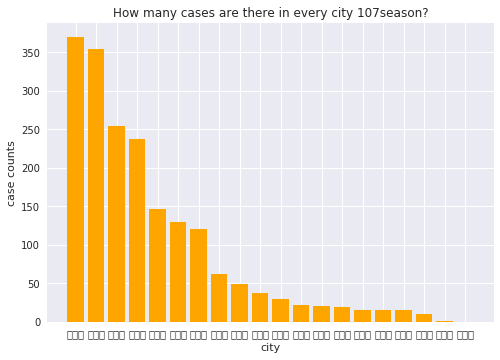

In [15]:
import matplotlib.pyplot as plt
amount = len(case_sum_city.values)
plt.bar(range(amount), case_sum_city.values, color="#ffa500")
plt.xticks(range(amount), case_sum_city.index)
plt.title("How many cases are there in every city 107season?")
plt.xlabel("city")
plt.ylabel("case counts")
plt.show()
#matplotlib中文無法顯示

In [0]:
hex_colors = ["#0084ff", "#44bec7", "#ffc300", "#fa3c4c", "#d696bb"]
city = brain_stroke["city"].unique()


##各縣市住院數與手術數關係

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


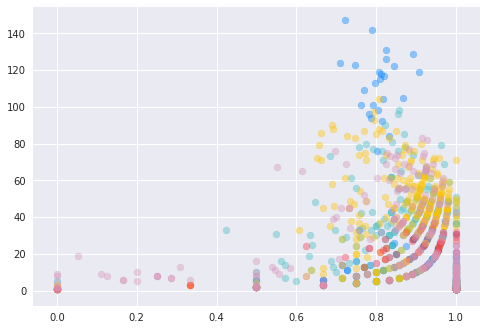

In [48]:
#各縣市住院數與手術數關係
for col, place in zip(hex_colors, city):
  subset_df = brain_stroke[brain_stroke["city"] == place]
  plt.scatter(subset_df["be_in_hosp"], subset_df["surgery"], color=col, alpha=0.4, label=city)
plt.show()
#中文無法呈現

#lung cancer

In [18]:
import pandas as pd
lung_cancer = pd.read_excel("lung cancer new.xlsx")
lung_cancer.head()

,year,city code,city,average life,age65,plantAmount,plant,Sex ratio,Unemployment,Tax,bed,PM10 (μg/m3),SO2 (ppb),NO2 (ppb),pop,smoking rate,cancer,cars
0,2011,1,New Taipei City,80.46,334479,1,1,98.14,4.4,168759548,42.00,42.0,3.5,17.20,3916451,21.9,1803,3284713
1,2012,1,New Taipei City,80.50,353396,1,1,97.69,4.2,186386348,42.21,38.0,3.1,16.00,3939305,19.5,2003,3309078
2,2013,1,New Taipei City,80.59,374883,1,1,97.27,4.2,204029784,41.13,41.8,3.4,16.10,3954929,20.8,1998,3233275
3,2014,1,New Taipei City,80.75,400545,1,1,96.86,3.9,221096918,42.85,43.1,3.4,16.60,3966818,18.4,2160,3178499
4,2015,1,New Taipei City,80.96,429175,0,1,96.64,3.7,246632933,43.29,40.1,3.2,15.85,3970644,17.7,2175,3183551


In [19]:
lung_cancer["city"].unique()

array(['New Taipei City', 'Taipei City', 'Taoyuan City', 'Taichung City',
       'Tainan City', 'Kaohsiung City', 'Yilan County', 'Hsinchu County',
       'Miaoli County', 'Changhua County', 'Nantou County',
       'Yunlin County', 'Chiayi County', 'Pingtung County',
       'Taitung County', 'Hualien County', 'Keelung City', 'Hsinchu City',
       'Chiayi City'], dtype=object)

In [20]:
lung_cancer["year"].unique()

array([2011, 2012, 2013, 2014, 2015])

In [21]:
groupbeYear = lung_cancer.groupby("year")
cancer_year_ser = groupbeYear["cancer"].sum().sort_values(ascending=False)
cancer_year_ser.index

Int64Index([2015, 2014, 2013, 2012, 2011], dtype='int64', name='year')

In [22]:
cancer_year_ser.values

array([13002, 12386, 11661, 11601, 10972])

In [23]:
#每年平均吸菸率
smoking_year_ser = groupbeYear["smoking rate"].mean().sort_values(ascending=False)
smoking_year_ser.index

Int64Index([2011, 2012, 2013, 2015, 2014], dtype='int64', name='year')

In [24]:
smoking_year_ser.values

array([19.12105263, 18.76315789, 17.50526316, 17.20526316, 17.16842105])

##歷年肺癌人數

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


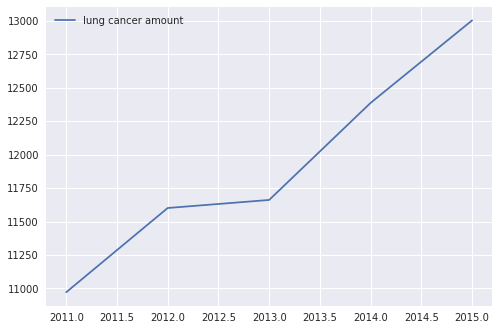

In [25]:
#歷年肺癌人數
plt.plot(cancer_year_ser.index,cancer_year_ser.values, label = "lung cancer amount")
plt.legend()
plt.show()

In [26]:
groupbe_city = lung_cancer.groupby("city")
city_ser = groupbe_city["cancer"].sum().sort_values(ascending=False)
city_ser.index

Index(['New Taipei City', 'Taipei City', 'Kaohsiung City', 'Taichung City',
       'Tainan City', 'Taoyuan City', 'Changhua County', 'Yunlin County',
       'Pingtung County', 'Chiayi County', 'Yilan County', 'Miaoli County',
       'Nantou County', 'Hsinchu County', 'Keelung City', 'Hsinchu City',
       'Hualien County', 'Chiayi City', 'Taitung County'],
      dtype='object', name='city')

In [27]:
city_ser.values

array([10139,  7479,  7091,  6067,  5149,  4441,  3795,  2240,  2162,
        1794,  1437,  1301,  1289,  1042,  1014,   906,   881,   731,
         664])

##各縣市肺癌總數

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


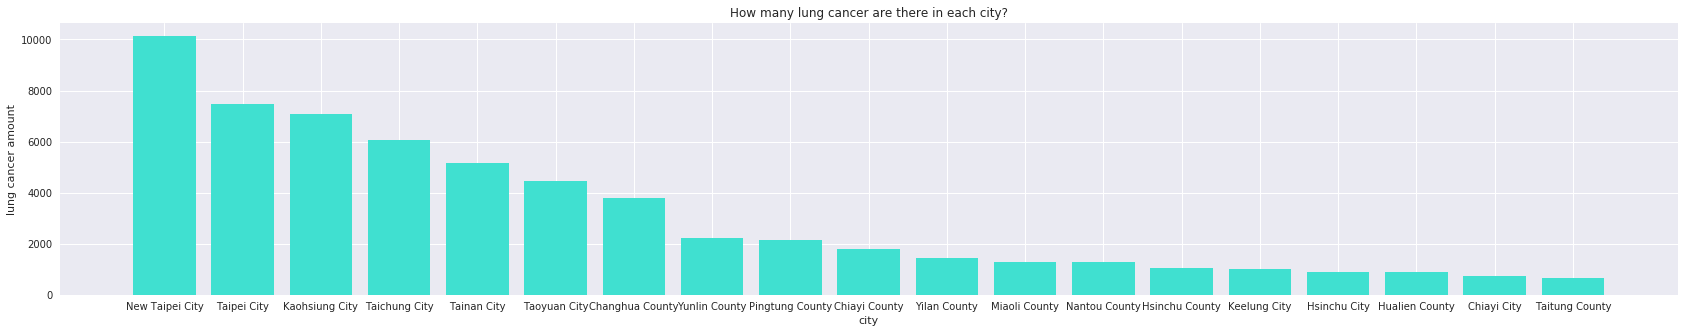

In [67]:
figure, axis = plt.subplots(figsize=(29, 5))
amount_each_city = len(city_ser.values)
plt.bar(range(amount_each_city), city_ser.values, color="#40e0d0")
plt.xticks(range(amount_each_city), city_ser.index)
plt.title("How many lung cancer are there in each city?")
plt.xlabel("city")
plt.ylabel("lung cancer amount")
plt.show()